In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.stats as sts
import scipy
import seaborn as sns
import scipy.optimize as opt
from scipy.optimize import fmin
import seaborn as sns

In [2]:
df = pd.read_table('/content/IB_statistics_data_HW2.5.txt',sep='\s+', engine='python')

In [3]:
df

,Ex3.y,Ex3.x1,Ex3.x2,Ex3.x3,Ex3.x4,Ex6.y,Ex6.x1,Ex6.x2
0,151.415,3,10,36,0,21.7348,1.9170,4.3877
1,-65.184,3,6,24,0,22.7452,1.1572,4.4260
2,-53.862,3,6,24,0,28.7458,1.3186,4.8105
3,-142.321,2,4,16,0,36.2004,1.2200,5.0803
4,130.260,2,9,31,1,18.6337,1.1180,4.1165
5,75.966,5,9,37,1,32.7178,1.2331,4.9657
6,131.943,2,9,31,1,21.6698,0.1853,4.3400
7,33.612,4,8,32,1,17.6593,1.5880,4.0542
8,127.638,4,10,38,0,20.1400,0.2230,4.2464
9,-90.878,2,5,19,0,29.6387,1.9652,4.8845


In [4]:
n = 42
alpha = 0.05

### Задача 1.

- (a) 

По определению если $\mathbb{X}^T : V → W$, то $Im(\mathbb{X}^T) := \{ {w} \in W : {w} = \mathbb{X}^Tv \mbox{ для некоторого \({v} \in V\)} \}.$

Заметим, что $v^T\mathbb{X} = w^T$. Откуда $v^T\mathbb{X}\mathbb{X}^Tv = w^Tw ⇔ v^T(\mathbb{X}^T\mathbb{X})^Tv = w^Tw ⇔ v^T(\mathbb{X}^T\mathbb{X})^Tv = v^T\mathbb{X}w ⇔ (\mathbb{X}^T\mathbb{X})^Tv = \mathbb{X}w.$ Поскольку $\mathbb{X}^T\mathbb{X}$ -- симметричная матрица (матрица Грама), то $\mathbb{X}^T\mathbb{X}v = \mathbb{X}w.$ Отсюда следует, что $Im(\mathbb{X}^T\mathbb{X}) \subseteq Im(\mathbb{X})$.

Как было показано в ДЗ1, $rank(\mathbb{X}^T\mathbb{X}) = rank(\mathbb{X}^T)$. Откуда следует , что  $dim(\mathbb{X}^T\mathbb{X}) = dim(\mathbb{X}^T)$. А значит из $Im(\mathbb{X}^T\mathbb{X}) \subseteq Im(\mathbb{X})$ и $dim(\mathbb{X}^T\mathbb{X}) = dim(\mathbb{X}^T)$ следует, что $Im(\mathbb{X}^T\mathbb{X}) = Im(\mathbb{X})$. (Подпространство векторного пространства одинаковой размерности).

- (b)

Пусть дана матрица $X$, такая что $∀ b: ||Ax - b|| → \min, x = Xb$. Тогда имеем $||AXb - b|| = ||(AX - \mathbb{I})b||$. Поскольку $||(AX - \mathbb{I})b||$ минимально, то и $||(AX - \mathbb{I})b||^2$ минимально, тогда $||(AX - \mathbb{I})b||^2 = ((AX - \mathbb{I})b , (AX - \mathbb{I})b) = (AXb, AXb) - 2(AXb, b) + (b,b)$. Возьмем производную по $X$ от данного скалярного произведения  $\displaystyle\frac{∂[(AXb, AXb) - 2(AXb, b) + (b,b)]}{∂X} =2(Ab, AXb) - 2(Ab, b) = 0 ⇔ (Ab, AXb - b) = 0 ⇔ (AXb - b, Ab) = 0 ⇔ (AXb, Ab) = (b, Ab) (1)$. Если $(AX)^T ≠ AX$, тогда в случае, если $A$ необратима (1) не имеет решений. Тогда рассмотрим случай, когда  $(AX)^T = AX$ (2), то есть $AX$ -- симметричная матрица, значит (1) можно записать как $(b, AXAb) = (b, Ab)$, откуда $AXAb = A$ и $AXA = A$ (3). Исходя из (2) и (3) делаем вывод, что $X \in A^{\{1, 3\}}$, что и требовалось доказать.

- (c)

Запишем svd для матрицы $\mathbb{X} = U \Sigma V^T$. Тогда $\mathbb{X}^T\mathbb{X} = V \Sigma U^TU \Sigma V^T = V \Sigma^2 V^T$ и $\mathbb{X}^T=V \Sigma U^T$. Запишем ридж-оценку через svd $\tilde\beta(r) = (\mathbb{X}^T\mathbb{X} + r\mathbb{I})^{-1}\mathbb{X}^T\mathbb{Y} = (V \Sigma^2 V^T + rVV^T)^{-1}V \Sigma U^T \mathbb{Y} = (V (\Sigma^2+ r\mathbb{I})V^T)^{-1}V \Sigma U^T \mathbb{Y} = V (\Sigma^2+ r\mathbb{I})^{-1}V^TV \Sigma U^T \mathbb{Y} $. Возьмем предел $\lim\limits_{r→0}\tilde \beta(r) =V \Sigma^{-2}V^TV \Sigma U^T \mathbb{Y} $. Так как $(\mathbb{X}^T\mathbb{X})^+ = V \Sigma^{-2} V^T$ (по свойству матрицы $V$ -- ортогональная матрица). И тогда предел равен $(\mathbb{X}^T\mathbb{X})^+\mathbb{X}^T\mathbb{Y}$. Что и требовалось доказать.

### Задача 2.

$\hat\beta = (\mathbb{X}^T\mathbb{X})^-\mathbb{X}^T\mathbb{Y}$, где $(\mathbb{X}^T\mathbb{X})^- \in A^{\{1, 3\}}$. 

Покажем, что $(\mathbb{X}^T\mathbb{X})^- = (\mathbb{X}^T\mathbb{X})^+.$ Так как $K = \mathbb{X}^T\mathbb{X}$ -- симметричная матрица, то $K^- = (K^T)^-$, откуда $(K^-K)^T = K((K^T)^-)^T = KK^- = (KK^-)^T = K^-K.$

Покажем, что $K^-KK^- = K^-$. Так как $KK^-K = K$, то $K^-K^-KK^-K = K^-K^-K ⇔ K^-K^-K = K^-$ и в силу показанного выше: $K^-KK^- = K^-$. 

$cov(\hat\beta ) =  \mathbb E[\hat\beta\hat\beta^T]-\mathbb E[\hat\beta]\mathbb E[\hat \beta^T]=\mathbb E[(X^TX)^{+}X^T\mathbb{Y}\mathbb{Y}^TX(X^TX)^{+}]-\mathbb \beta\beta^T =(X^TX)^{+}X^T\mathbb E[\mathbb{Y}\mathbb{Y}]X(X^TX)^{+}-\beta\beta^T =(X^TX)^{+}X^T(\sigma^2\mathbb{I}+X\beta\beta^TX^T)X(X^TX)^{+}-\beta\beta^T = [(X^TX)^{+}X^T\sigma^2 + (X^TX)^{+}X^TX||\beta||^2X^T]X(X^TX)^{+}-||\beta||^2 = \sigma^2(X^TX)^{+}X^TX(X^TX)^{+} + (X^TX)^{+}(X^TX)(X^TX)(X^TX)^{+}||\beta||^2 - ||\beta||^2 = \sigma^2K^{+}KK^{+} + K^{+}KKK^{+}||\beta||^2 - ||\beta||^2 = \sigma^2K^{+}KK^{+} + K^-K^-KKKK^-K^-K||\beta||^2 - ||\beta||^2 = \sigma^2K^{+} = \sigma^2(X^TX)^{+}$.

### Задача 3.

- (a)

Поскольку $\sum\beta_i = 0$, то и $2\sum\beta_i = 0$. Пусть дана матрица $A = \begin{pmatrix}
1 & 1 & 1 & 1\\
2 & 2 & 2 & 2\\
\end{pmatrix}$. И вектор $b = (0, 0)$. Тогда имеем линейное ограничение на параметр $\beta: A\beta = b$. Такая задача уже была решена в ДЗ1. Сначала строится оценка $\hat\beta = (\mathbb{X}^T\mathbb{X})^+\mathbb{X}^T\mathbb{Y}$, затем находим матрицу $D = A(\mathbb{X}^T\mathbb{X})^+A^T$. После чего строим оценку $\hat\beta_b = \hat\beta - (\mathbb{X}^T\mathbb{X})^+A^TD^+(A\hat\beta - b)$.

In [ ]:
X = df.loc[:, 'Ex3.x1':'Ex3.x4'].to_numpy()
y = df['Ex3.y'].to_numpy()
X = np.array(np.concatenate(([np.ones(n)], X.T), axis=0)).T
beta = np.linalg.pinv(X.T @ X) @ X.T @ y
A = np.array([[1, 1, 1, 1, 1], [2, 2, 2, 2, 2]])
b = np.array([beta[0], 2 * beta[0]])
D = A @ np.linalg.pinv(X.T @ X) @ A.T
betab = beta - np.linalg.pinv(X.T @ X) @ A.T @ np.linalg.pinv(D) @ (A @ beta - b)
print('Оценка beta равна', betab, '\nусловие sum(betai) = 0: sum(betai) = ', sum(betab) - beta[0], 'выполняется')

Оценка beta равна [-326.99552653  -38.15533945   28.33011435    8.67966416   12.06303022] 
условие sum(betai) = 0: sum(betai) =  5.684341886080802e-14 выполняется


- (b)

Минимизируем функционал $||\beta||$

In [ ]:
def minf(b):
   return np.sum((y - X @ b) ** 2)

def con(b):
    return fmin(minf, b)

cons = {'type':'eq', 'fun': con}

def f(b):
    return b.T @ b

beta1 = opt.minimize(f, beta, constraints=cons).x

In [ ]:
print('Оценка параметра равна', beta1)
print('Исходное значение:', np.linalg.norm(beta), '\nоптимизированное:', np.linalg.norm(beta1))

Оценка параметра равна [-1.22813011e+00  3.63427397e-03  2.95981487e-02 -1.58098000e-05
  5.84386993e-02]
Исходное значение: 319.79710593558036 
оптимизированное: 1.2298812525509302


- (c)

Ковариационная матрица равна $cov(\beta) = \sigma^2(X^TX)^+$.

In [ ]:
Vn = np.linalg.pinv(X.T @ X )

Необходимо минимизировать сумму ковариаций. Посчитаем сумму, деленную на $\sigma^2$.

In [ ]:
s = 0
for i, m in enumerate(Vn):
    for j, m in enumerate(Vn):
        if i > j:
            s += np.abs(Vn[i][j])
s 

0.11330114238979773

Так как сумма абсолютных значений ковариаций в итоге будет зависеть от параметра $\sigma^2$, то будем минимизировать его оценку по $\beta$.

In [ ]:
m = 4 # количество регрессоров

def minf(b):
   return np.sum((y - X @ b) ** 2) 

def con(b):
    return fmin(minf, b)

cons = {'type':'eq', 'fun': con}

def f(b):
    return  np.sum((y - X @ b) ** 2) / (n - m - 1) * s

beta2 = opt.minimize(f, beta, constraints=cons).x

In [ ]:
print('Оценка параметра равна', beta2)

Оценка параметра равна [ 2.58355914e-01 -1.19861601e-03 -9.89559544e-06 -1.74384812e-06
 -1.80886661e-03]


- (d)

Пусть функционал равен дисперсии ошибок $D(\varepsilon) = D(\beta X - y)$.

In [ ]:
def minf(b):
   return np.sum((y - X @ b) ** 2)

def con(b):
    return fmin(minf, b)

cons = {'type':'eq', 'fun': con}

def f(b):
    return np.var(X @ b - y)

beta3 = opt.minimize(f, beta, constraints=cons).x

In [ ]:
print('Оценка параметра равна', beta3)

Оценка параметра равна [ 1.97246471e-01  1.46450017e-03  4.73082411e-03  2.47430087e-06
 -5.13408482e-04]


Самая маленькая оценка получилась для предпоследнего случая.

### Задача 4.

Как и в задаче 4.d ДЗ1 для проверки данной гипотезы воспользуемся распределением Фишера. Будем проверять гипотезу для третьей.

In [ ]:
eps2 = (X @ beta2 - np.mean(y)) ** 2
eps = (y - X @ beta2) ** 2
k = n - m
p = m + 1

sigma = sum(eps) / k
sigma2 = sum(eps2) / p

F = sigma2 / sigma 
f = sts.f.ppf(q=alpha, dfn=p, dfd=k, loc=0, scale=1)

print('Статистика критерия равна', F)
if (F < f):
    print(f'Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости {alpha}')
else:
    print(f'Есть основания отклонить H_0 в пользу H_1 с уровнем значимости {alpha}')
print('Значение p-value равно', sts.f.cdf(x=F, dfn=p, dfd=k, loc=0, scale=1))

Статистика критерия равна 1.403343974381953
Есть основания отклонить H_0 в пользу H_1 с уровнем значимости 0.05
Значение p-value равно 0.7549279497237642


### Задача 5.

Смоделируем выборку.

In [ ]:
def sample(n = 100):
    x1 = sts.uniform.rvs(loc = -30, scale = 40, size = n)
    x2 = sts.poisson.rvs(mu = 10, loc = 0, size = n)
    X = np.array([x1, x2]).T
    beta1, beta2 = 1, 1
    eps = sts.norm.rvs(loc= 0, scale = 0.2, size = n)
    y = np.arctan(beta1 * x1 + beta2 * x2) + eps
    return X.T, y

X, y = sample(n = 100)

- ОМП-оценка: $\hat{\beta} =  \min\limits_{\beta}\sum_{j=1}^n(y_j - \arctan(\mathbf{x}_j,\beta))^2$

In [ ]:
def beta_mle(X, y):

  def f(beta):
      return sum((y - np.arctan(beta[0] * X[0] + beta[1] * X[1])) ** 2) 

  beta_mle = fmin(f, [1, 1])
  return beta_mle

beta1 = beta_mle(X, y)
beta1

Optimization terminated successfully.
         Current function value: 4.809224
         Iterations: 25
         Function evaluations: 51


array([1.01549634, 1.01887432])

- МНК-оценка после сведения модели к линейной: $\tan(y) = \beta\mathbf{x} + \xi, \ \tan(y) = y^* ,\ \hat\beta = (\mathbb{X}^T\mathbb{X})^{-1}\mathbb{X}^T\mathbb{Y}^*$.

In [ ]:
def beta_mls(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ np.tan(y)

beta2 = beta_mls(X.T, y)
beta2

array([ 0.21158186, -0.45116681])

- МНК-оценка после сведения модели к линейной с уточнением за счет разложения в ряд Тейлора: $\tan(\arctan(\beta \mathbf{x})) = \tan(y) + \displaystyle\frac{\arctan(\beta \mathbf{x} ) - y}{\cos^2(y)} = \tan(y) + \displaystyle\frac{\varepsilon}{cos^2(y)} = \beta \mathbf{x}$. Модель гетероскедастичная, поэтому  $cov(\varepsilon) = \displaystyle\frac{\mathbb{\sigma^2I}}{cos^2(y)}$.

In [ ]:
def beta_teylor(X, y):    
    w = np.array( 1 / (np.cos(y) ** 2))
    z = np.tan(y) * w

    def transformx(x, v):
      for i in range(len(x.T)):
          x.T[i] *= v

    transformx(X, w)

    return np.linalg.inv(X.T @ X) @ X.T @ z

beta3 = beta_teylor(X.T, y) 
beta3

array([-2.11512135e-04, -9.17316985e-05])

Смоделируем распределение каждой из полученных оценок, для этого смоделируем большое количество выборок и посчитаем для них оценки.

In [ ]:
N = 100

samples = [sample() for i in range(N)] # выборки исходных данных
betas1 = np.array([beta_mle(s[0], s[1]) for s in samples]).T # выборки для ОМП-оценок
betas2 = np.array([beta_mls(np.array(s[0]).T, s[1]) for s in samples]).T # выборки для МНК-оценок (линеаризованная модель)
betas3 = np.array([beta_teylor(np.array(s[0]).T, s[1]) for s in samples]).T # выборки для МНК-оценок (с использованием ряда Тейлора)

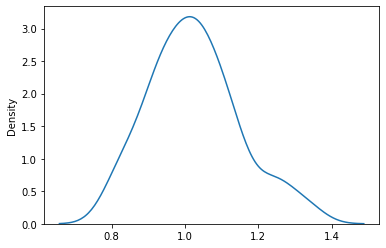

In [ ]:
sns.kdeplot(betas1[0])

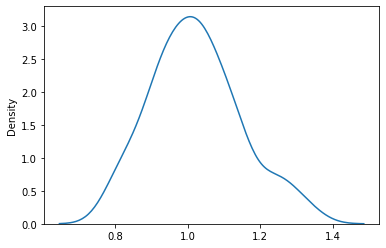

In [ ]:
sns.kdeplot(betas1[1])

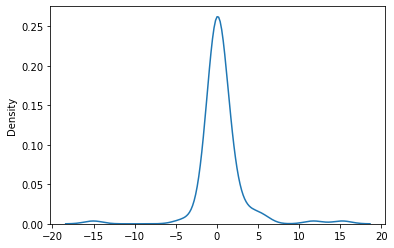

In [ ]:
sns.kdeplot(betas2[0])

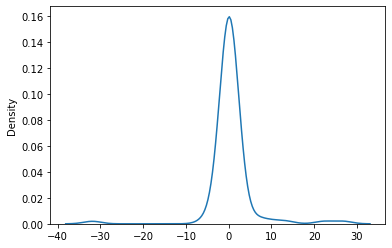

In [ ]:
sns.kdeplot(betas2[1])

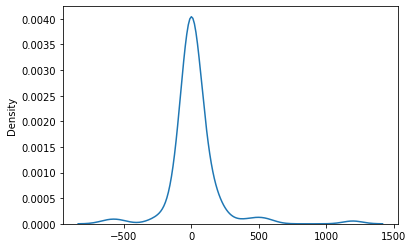

In [ ]:
sns.kdeplot(betas3[0])

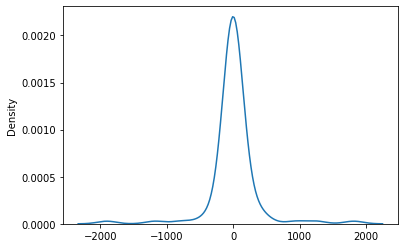

In [ ]:
sns.kdeplot(betas3[1])

In [ ]:
print('Среднее значение первой оценки', '(', np.mean(betas1[0]), ',', np.mean(betas1[1]), ')')
print('Стандартное отклонение первой оценки', '(', np.std(betas1[0]), ',', np.std(betas1[1]), ')\n')
print('Среднее значение второй оценки', '(', np.mean(betas2[0]), ',', np.mean(betas2[1]), ')')
print('Стандартное отклонение второй оценки', '(', np.std(betas2[0]), ',', np.std(betas2[1]), ')\n')
print('Среднее значение третьей оценки', '(', np.mean(betas3[0]), ',', np.mean(betas3[1]), ')')
print('Стандартное отклонение третьей оценки', '(', np.std(betas3[0]), ',', np.std(betas3[1]), ')')

Среднее значение первой оценки ( 1.024930494016598 , 1.0224351099769402 )
Стандартное отклонение первой оценки ( 0.12257196300294095 , 0.1230289098734288 )

Среднее значение второй оценки ( 0.4632846079501198 , 0.56143856418155 )
Стандартное отклонение второй оценки ( 2.805269141351837 , 5.19802511503908 )

Среднее значение третьей оценки ( 24.401220203616433 , 7.992841780861989 )
Стандартное отклонение третьей оценки ( 183.5880627730294 , 359.65328756530414 )


Лучше получилась ОМП-оценка, так как ее среднее значение наиболее близко к теоретическому. При разложении в ряд Тейлора оценки получаются самые далекие от теоретических. Вторая модель показывает также не совсем плохой результат.

### Задача 6.

Так как данная функция $f_{\beta} = \beta_0 + \beta_1x_1x_2 + e^{\beta_2x_2} + \varepsilon$ является непрерывно дифференцируемой, ошибки имеют нормальное распределение $\varepsilon \sim \mathcal{N}(0, \sigma^2)$ и МНК-оценка единственна, то можем воспользоваться критерием с последнего слайда лекции 18.

Так как $\sigma^2$ также неизвестна, то построим оценку параметра. Сначала оценим параметр $\beta$ с помощью ОМП.

In [125]:
X = df.loc[:, 'Ex6.x1':'Ex6.x2'].to_numpy()
y = df['Ex6.y'].to_numpy()
X = np.array(np.concatenate(([np.ones(n)], X.T), axis=0)).T
beta = np.array([1, 0, np.log(2)])
def beta_mle(X, y):

  def f(beta):
      return sum((y - (beta[0] + beta[1] * X[1] * X[2] + np.exp(beta[2] * X[2]))) ** 2) 

  beta_ml = fmin(f, [1, 1, 1])
  return beta_ml

beta1 = beta_mle(X.T, y)
beta1

Optimization terminated successfully.
         Current function value: 8.466899
         Iterations: 157
         Function evaluations: 282


array([0.92273993, 0.00199547, 0.69412416])

Теперь построим оценку $\sigma^2$.

In [115]:
m = 2
sigma = np.sqrt(np.sum((y - X @ beta1) ** 2) / (n - m - 1))

Рассмотрим отношение правдоподобия.

In [116]:
L0 = sum((y - (beta[0] + beta[1] * X.T[1] * X.T[2] + np.exp(beta[2] * X.T[2]))) ** 2)
L1 = sum((y - (beta1[0] + beta1[1] * X.T[1] * X.T[2] + np.exp(beta1[2] * X.T[2]))) ** 2)
LHR = (L0 / L1) ** (-n / 2)
LHR

0.6431021993836427

Статистика критерия

In [117]:
T = L0 / L1
T

1.0212440142690904

Смоделируем функцию распределения статистики критерия

In [ ]:
n , N = 42, 1000
beta = np.array([1, 0, np.log(2)])

def y(x):
      return (beta[0] + beta[1] * x[1] * x[2] + np.exp(beta[2] * x[2]) -
              sts.norm.rvs(loc = 0, scale = 0.01))

x_samples = [np.array([np.ones(n), 
                      sts.uniform.rvs(loc= 0, scale = 2, size = n), 
                      sts.uniform.rvs(loc= 3, scale = 2, size = n)]) for k in range(N)]

y_samples = np.array([y(x) for x in x_samples])


betas = np.array([beta_mle(z[0], z[1]) for z in list(zip(x_samples, y_samples))])

Сгенерируем статистики критерия, а затем построим эмпирическую функцию распределения

In [131]:
def Tn(X, y, beta_ml):
    L0 = sum((y - (beta[0] + beta[1] * X[1] * X[2] + np.exp(beta[2] * X[2]))) ** 2)
    L1 = sum((y - (beta_ml[0] + beta_ml[1] * X[1] * X[2] + np.exp(beta_ml[2] * X[2]))) ** 2)
    return L0 / L1

T_samples = np.array([Tn(z[0], z[1], z[2]) for z in list(zip(x_samples, y_samples, betas))])

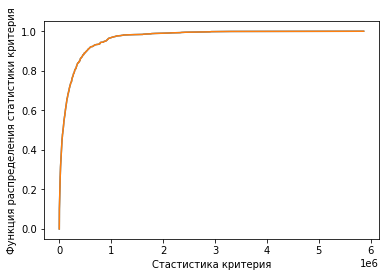

In [132]:
Fn = np.linspace(0, 1, N)

T_samples.sort()


plt.plot(T_samples, Fn)
plt.xlabel('Стастистика критерия')
plt.ylabel('Функция распределения статистики критерия')
plt.plot(T_samples, Fn)
plt.show()

In [133]:
pvalue = 1 - Fn[min(max((np.where(T_samples > T))))]
print('p-value равно', pvalue)

p-value равно 0.996996996996997


0.05-квавнтиль равен:

In [134]:
T_samples[49]

668.8973040278428

Критическая область $(668.8973040278428, +\infty)$. Статистика критерия равна. Получившаяся статистика равна $1.0212440142690904$. Значит нет оснований отклонить $H_0: \beta = (1, 0, \log(2))$ в пользу $H_1$. 